In [1]:
from grid import Grid
from utility import region_to_str, min_regions
from remove_restore import calc_diff_grid
import matplotlib.pyplot as plt

In [2]:
UPDATE_FILENAMES = ["../bath_data/NOAA_South_VancouverIsland_30m.tif", "../bath_data/sample_data.tif"]
OUTPUT = "test_out.nc"
BASE_GRID_FNAME = "../bath_data/GEBCO_2019_-157.0_62.0_-121.0_35.0.nc"
SPACING = 1e-3
REGION_OF_INTEREST = [-123.3, -122.8, 48.400, 48.900]

Loading ../bath_data/GEBCO_2019_-157.0_62.0_-121.0_35.0.nc
Resolution: (6481, 8641)


grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -123.3 to -123.302083333
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.8 to -122.79375
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 48.4 to 48.3979166667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 48.9 to 48.90625


Resampling from 0.004166666666662877 to 0.001
Loading resampled.nc
Resolution: (508, 508)


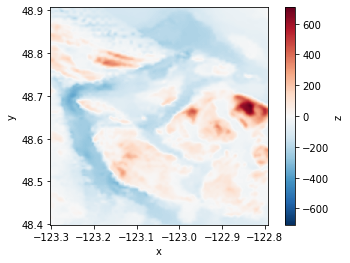

In [3]:
base_grid = Grid(BASE_GRID_FNAME)
base_grid.crop(REGION_OF_INTEREST)
base_grid.resample(SPACING)

plt.axes().set_aspect('equal')
base_grid.plot()
plt.show()

Loading ../bath_data/NOAA_South_VancouverIsland_30m.tif
Resolution: (12277, 8172)
CRS: +init=epsg:4326
Blockmedian update grid
Find z in base grid


grdtrack [WARNING]: Some input points were outside the grid domain(s).


Create difference grid
Loading diff.nc
Resolution: (508, 508)


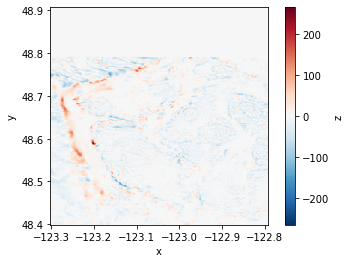

Loading ../bath_data/sample_data.tif
Resolution: (3383, 1849)
CRS: +init=epsg:4326
Blockmedian update grid
Find z in base grid
Create difference grid
Loading diff.nc
Resolution: (508, 508)


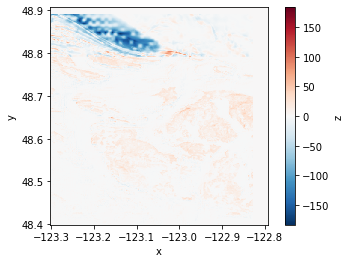

In [4]:
for fname in UPDATE_FILENAMES:
    update_grid = Grid(fname, convert_to_xyz=True)

    diff_grid_xr = calc_diff_grid(base_grid, update_grid)
    
    plt.axes().set_aspect('equal')
    diff_grid_xr.plot()
    plt.show()

    base_grid.grid.values += diff_grid_xr.values

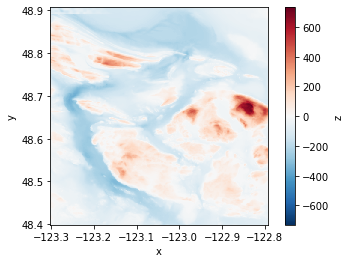

In [5]:
plt.axes().set_aspect('equal')
base_grid.plot()
plt.show()

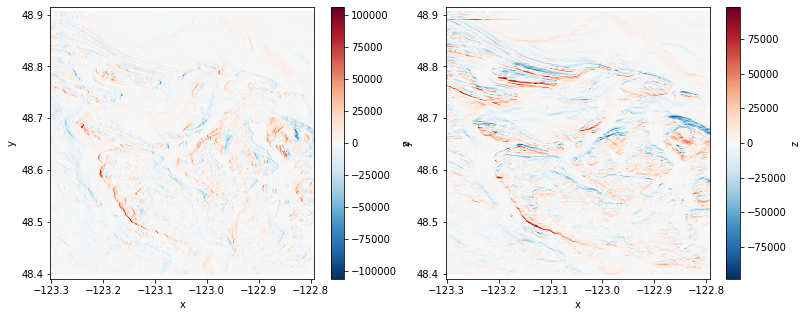

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
for ax in axes:
    ax.axis('equal')
base_grid.grid.differentiate('x').plot(ax=axes[0])
base_grid.grid.differentiate('y').plot(ax=axes[1])
plt.show()

In [7]:
base_grid.save_grid(OUTPUT)